In [3]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import matplotlib.animation as animation
from matplotlib import rc
from matplotlib import rc
from IPython.display import HTML, Image
rc('animation', html='html5')
import seaborn as sns # improves plot aesthetics
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [4]:
path_mapsummary = 'summary_9.txt'
path_length = 'length_9'
count = 9
count_ = 34  # 9sample:34  61 sample:36

# 1. mapping ratio plot

In [5]:
col_names = ['Sample','Raw_reads','Clean_reads','Clean_reads_ratio','rRNA','rRNA_ratio','Kept_reads','hg38','hg38_ratio',
               'miRNA_pre','miRNA_pre_ratio','piRNA','piRNA_ratio','Y_RNA','Y_RNA_ratio',
                'snRNA','snRNA_ratio','srpRNA','srpRNA_ratio','tRNA','tRNA_ratio',
                'other_lncRNA','other_lncRNA_ratio','mRNA','mRNA_ratio']
table = pd.read_table(path_mapsummary,delimiter="\t",names = col_names,index_col=0,skiprows=[0])

In [6]:
Raw_reads = np.array(table.iloc[:,0])
Clean_reads = np.array([np.array(table['Clean_reads_ratio'].str.split(' ')[i])[0] for i in range(count)])
Clean_reads_ratio = np.array([np.array(table['Clean_reads_ratio'].str.split(' '))[i][1][1:-1] for i in range(count)])
Kept_reads = np.array(table.iloc[:,3]) 
rRNA = np.array(table.iloc[:,4]) 
rRNA_ratio = np.array(table.iloc[:,5]) 
hg38 = np.array(table.iloc[:,6]) 
hg38_ratio = np.array(table.iloc[:,7]) 
miRNA_pre = np.array(table.iloc[:,8]) 
miRNA_pre_ratio = np.array(table.iloc[:,9]) 
piRNA = np.array(table.iloc[:,10]) 
piRNA_ratio = np.array(table.iloc[:,11]) 
Y_RNA = np.array(table.iloc[:,12]) 
Y_RNA_ratio = np.array(table.iloc[:,13]) 
snRNA = np.array(table.iloc[:,14]) 
snRNA_ratio = np.array(table.iloc[:,15]) 
srpRNA = np.array(table.iloc[:,16]) 
srpRNA_ratio = np.array(table.iloc[:,17]) 
tRNA = np.array(table.iloc[:,18]) 
tRNA_ratio = np.array(table.iloc[:,19]) 
other_lncRNA = np.array(table.iloc[:,20]) 
other_lncRNA_ratio = np.array(table.iloc[:,21]) 
mRNA = np.array(table.iloc[:,22]) 
mRNA_ratio = np.array(table.iloc[:,23])

In [7]:
newarray = np.concatenate((Raw_reads,pd.Series(Clean_reads),pd.Series(Clean_reads_ratio),rRNA,rRNA_ratio,Kept_reads,hg38,hg38_ratio,
            miRNA_pre,miRNA_pre_ratio,piRNA,piRNA_ratio,Y_RNA,Y_RNA_ratio,
                snRNA,snRNA_ratio,srpRNA,srpRNA_ratio,tRNA,tRNA_ratio,
                other_lncRNA,other_lncRNA_ratio,mRNA,mRNA_ratio),axis=0).reshape(-1,count).T
newtable = pd.DataFrame(newarray)
newtable.columns = col_names[1:]
newtable

,Raw_reads,Clean_reads,Clean_reads_ratio,rRNA,rRNA_ratio,Kept_reads,hg38,hg38_ratio,miRNA_pre,miRNA_pre_ratio,...,snRNA,snRNA_ratio,srpRNA,srpRNA_ratio,tRNA,tRNA_ratio,other_lncRNA,other_lncRNA_ratio,mRNA,mRNA_ratio
0,10000000,9312406,93.1%,430323,4.62%,8882083,8087123,86.84%,2988606,32.09%,...,17397,0.19%,1889,0.02%,11749,0.13%,348378,3.74%,193670,2.08%
1,10000000,9502139,95.0%,218169,2.30%,9283970,8606253,90.57%,4790759,50.42%,...,29897,0.31%,1688,0.02%,8321,0.09%,102259,1.08%,63028,0.66%
2,10000000,9296659,93.0%,549498,5.91%,8747161,7777405,83.66%,2465426,26.52%,...,13480,0.14%,1587,0.02%,13855,0.15%,271412,2.92%,105254,1.13%
3,10000000,8978108,89.8%,481869,5.37%,8496239,7329237,81.63%,4312497,48.03%,...,10458,0.12%,1241,0.01%,10629,0.12%,240436,2.68%,86592,0.96%
4,10000000,9296170,93.0%,178380,1.92%,9117790,6879091,74.00%,3883900,41.78%,...,34856,0.37%,2705,0.03%,11785,0.13%,89145,0.96%,61936,0.67%
5,10000000,8916646,89.2%,432462,4.85%,8484184,7105413,79.69%,3507872,39.34%,...,12081,0.14%,1370,0.02%,10161,0.11%,204007,2.29%,82967,0.93%
6,10000000,9521351,95.2%,42734,0.45%,9478617,9060045,95.16%,3085844,32.41%,...,1400,0.01%,415,0.00%,6381,0.07%,15184,0.16%,15840,0.17%
7,10000000,9755014,97.6%,98225,1.01%,9656789,9365842,96.01%,2841311,29.13%,...,1337,0.01%,319,0.00%,7560,0.08%,28740,0.29%,18382,0.19%
8,10000000,9226584,92.3%,60950,0.66%,9165634,8446284,91.54%,3233721,35.05%,...,1162,0.01%,497,0.01%,7583,0.08%,17414,0.19%,16666,0.18%


Kept_reads :all 
other genomic region: hg38 - else  ratio:(hg38 - else)/Kept_reads
non human region: Kept_reads - hg38  ratio:(Kept_reads - hg38)/Kept_reads

In [8]:
newtable['other_genomic_region'] = newtable['hg38'] - (newtable['miRNA_pre'] +newtable['piRNA'] +
                 newtable['Y_RNA'] +newtable['snRNA']+newtable['srpRNA']+
                    newtable['tRNA']+newtable['other_lncRNA']+newtable['mRNA'])
newtable['non_human'] = newtable['Kept_reads'] - newtable['hg38']
newtable['other_genomic_region_ratio'] = newtable['other_genomic_region']/newtable['Kept_reads']
newtable['non_human_ratio'] = newtable['non_human']/newtable['Kept_reads']


In [9]:
def p2f(x):
    return float(x.strip('%'))/100
indexper = np.concatenate((np.array([2,4]),np.arange(7,25,2)))
newarray_per = np.array(newtable).copy()
for i in indexper:
    for j in range(count):
        newarray_per[j,i] = p2f(newarray[j,i])
newarray_per = newarray_per.astype('float')

In [10]:
average = np.average(newarray_per,axis=0)

In [11]:
average

array([1.00000000e+07, 9.31167522e+06, 9.31333333e-01, 2.76956667e+05,
       3.01000000e-02, 9.03471856e+06, 8.07296589e+06, 8.65666667e-01,
       3.45665956e+06, 3.71966667e-01, 2.03257000e+05, 2.18888889e-02,
       3.45315944e+06, 3.68066667e-01, 1.35631111e+04, 1.44444444e-03,
       1.30122222e+03, 1.44444444e-04, 9.78044444e+03, 1.06666667e-03,
       1.46330556e+05, 1.59000000e-02, 7.15927778e+04, 7.74444444e-03,
       7.17321778e+05, 9.61752667e+05, 8.05382847e-02, 1.07948208e-01])

In [12]:
newtable.head()

,Raw_reads,Clean_reads,Clean_reads_ratio,rRNA,rRNA_ratio,Kept_reads,hg38,hg38_ratio,miRNA_pre,miRNA_pre_ratio,...,tRNA,tRNA_ratio,other_lncRNA,other_lncRNA_ratio,mRNA,mRNA_ratio,other_genomic_region,non_human,other_genomic_region_ratio,non_human_ratio
0,10000000,9312406,93.1%,430323,4.62%,8882083,8087123,86.84%,2988606,32.09%,...,11749,0.13%,348378,3.74%,193670,2.08%,1125988,794960,0.126771,0.0895015
1,10000000,9502139,95.0%,218169,2.30%,9283970,8606253,90.57%,4790759,50.42%,...,8321,0.09%,102259,1.08%,63028,0.66%,1226341,677717,0.132092,0.0729986
2,10000000,9296659,93.0%,549498,5.91%,8747161,7777405,83.66%,2465426,26.52%,...,13855,0.15%,271412,2.92%,105254,1.13%,1016818,969756,0.116245,0.110865
3,10000000,8978108,89.8%,481869,5.37%,8496239,7329237,81.63%,4312497,48.03%,...,10629,0.12%,240436,2.68%,86592,0.96%,842139,1167002,0.099119,0.137355
4,10000000,9296170,93.0%,178380,1.92%,9117790,6879091,74.00%,3883900,41.78%,...,11785,0.13%,89145,0.96%,61936,0.67%,880164,2238699,0.0965326,0.245531


In [37]:
avedf = pd.DataFrame(average.reshape(1,-1),columns=newtable.columns,index=['average'])
newtable.append(avedf).tail()

,Raw_reads,Clean_reads,Clean_reads_ratio,rRNA,rRNA_ratio,Kept_reads,hg38,hg38_ratio,miRNA_pre,miRNA_pre_ratio,...,tRNA,tRNA_ratio,other_lncRNA,other_lncRNA_ratio,mRNA,mRNA_ratio,other_genomic_region,non_human,other_genomic_region_ratio,non_human_ratio
5,10000000,8916646,89.2%,432462,4.85%,8484184,7105413,79.69%,3507872,39.34%,...,10161,0.11%,204007,2.29%,82967,0.93%,788560,1378771,0.0929447,0.162511
6,10000000,9521351,95.2%,42734,0.45%,9478617,9060045,95.16%,3085844,32.41%,...,6381,0.07%,15184,0.16%,15840,0.17%,176874,418572,0.0186603,0.0441596
7,10000000,9755014,97.6%,98225,1.01%,9656789,9365842,96.01%,2841311,29.13%,...,7560,0.08%,28740,0.29%,18382,0.19%,189957,290947,0.0196708,0.0301288
8,10000000,9226584,92.3%,60950,0.66%,9165634,8446284,91.54%,3233721,35.05%,...,7583,0.08%,17414,0.19%,16666,0.18%,209055,719350,0.0228086,0.0784834
average,1e+07,9.31168e+06,0.931333,276957,0.0301,9.03472e+06,8.07297e+06,0.865667,3.45666e+06,0.371967,...,9780.44,0.00106667,146331,0.0159,71592.8,0.00774444,717322,961753,0.0805383,0.107948


In [38]:
indper = [2,4,7,9,11,13,15,17,19,21,23,26,27]
indint = np.setdiff1d(range(28),indper)
len(indper)+indint.shape[0]

28

In [39]:
average[indint] = average[indint].astype('int')
strper =  ['{:.4f}%'.format(average[indper][i]*100) for i in range(13)] 
average = average.astype('str')
average[indper] = strper

In [40]:
average

array(['10000000.0', '9311675.0', '93.1333%', '276956.0', '3.0100%',
       '9034718.0', '8072965.0', '86.5667%', '3456659.0', '37.1967%',
       '203257.0', '2.1889%', '3453159.0', '36.8067%', '13563.0',
       '0.1444%', '1301.0', '0.0144%', '9780.0', '0.1067%', '146330.0',
       '1.5900%', '71592.0', '0.7744%', '717321.0', '961752.0', '8.0538%',
       '10.7948%'], dtype='|S32')

In [41]:
avedf = pd.DataFrame(average.reshape(1,-1),columns=newtable.columns,index=['average'])
newtable.append(avedf).tail()

,Raw_reads,Clean_reads,Clean_reads_ratio,rRNA,rRNA_ratio,Kept_reads,hg38,hg38_ratio,miRNA_pre,miRNA_pre_ratio,...,tRNA,tRNA_ratio,other_lncRNA,other_lncRNA_ratio,mRNA,mRNA_ratio,other_genomic_region,non_human,other_genomic_region_ratio,non_human_ratio
5,10000000,8916646,89.2%,432462,4.85%,8484184,7105413,79.69%,3507872,39.34%,...,10161,0.11%,204007,2.29%,82967,0.93%,788560,1378771,0.0929447,0.162511
6,10000000,9521351,95.2%,42734,0.45%,9478617,9060045,95.16%,3085844,32.41%,...,6381,0.07%,15184,0.16%,15840,0.17%,176874,418572,0.0186603,0.0441596
7,10000000,9755014,97.6%,98225,1.01%,9656789,9365842,96.01%,2841311,29.13%,...,7560,0.08%,28740,0.29%,18382,0.19%,189957,290947,0.0196708,0.0301288
8,10000000,9226584,92.3%,60950,0.66%,9165634,8446284,91.54%,3233721,35.05%,...,7583,0.08%,17414,0.19%,16666,0.18%,209055,719350,0.0228086,0.0784834
average,10000000.0,9311675.0,93.1333%,276956.0,3.0100%,9034718.0,8072965.0,86.5667%,3456659.0,37.1967%,...,9780.0,0.1067%,146330.0,1.5900%,71592.0,0.7744%,717321.0,961752.0,8.0538%,10.7948%


In [42]:
newtable.append(avedf).to_csv('9sample.csv')

In [14]:
rnanames = ['miRNA', 'piRNA', 'Y_RNA', 'snRNA','srpRNA','tRNA',
            'lncRNA','mRNA','other_genomic_region','non_human',
            ]
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.) 
colours = tableau20[:10]

In [15]:
rnaindex= [9,11,13,15,17,19,21,23,26,27]

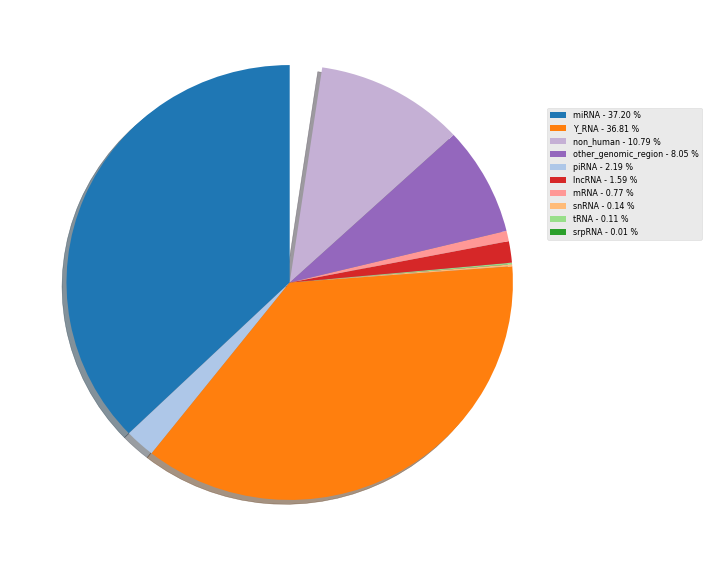

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = rnanames
y = average[rnaindex]
z = np.array([float('{:.4f}'.format(y[i])) for i in range(y.shape[0])])*100

fig1, ax1 = plt.subplots(figsize=(10,10))
patches, texts = ax1.pie(y,  colors=colours, #autopct='%1.1f%%',
                        shadow=True, startangle=90)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center', bbox_to_anchor=(1.1, .7),
           fontsize=8)

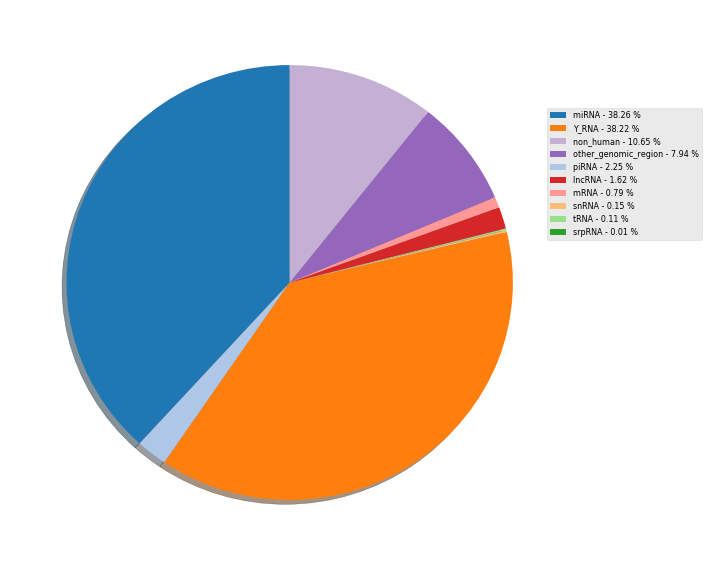

In [17]:
import matplotlib.pyplot as plt
import numpy as np
rnaindex_ = [8,10,12,14,16,18,20,22,24,25]
x = rnanames
y = average[rnaindex_]/average[5]
z = np.array([float('{:.4f}'.format(y[i])) for i in range(y.shape[0])])*100

fig1, ax1 = plt.subplots(figsize=(10,10))
patches, texts = ax1.pie(y,  colors=colours, #autopct='%1.1f%%',
                        shadow=True, startangle=90)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center', bbox_to_anchor=(1.1, .7),
           fontsize=8)

In [18]:
randnarr = np.random.uniform(-18,18,count).reshape(-1,1)
for i in range(9):
    randnarr = np.concatenate((randnarr,np.random.uniform(-18,18,count).reshape(-1,1)),axis=1)

In [20]:
#ratiodata:
ratiodata = [newarray_per[i,rnaindex_]/newarray_per[i,5] for i in range(count)]
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
dataarr =ratiodata
colave =  average[rnaindex]
sizes = np.repeat(16,10) +np.ceil((colave/np.average(colave) *2))
transformed = scalar.fit_transform(dataarr)
#dattest = pd.DataFrame(transformed)
angle = np.repeat(np.arange(0,360,36),count).reshape(10,-1).T +randnarr
#sizes = np.ceil((colave/np.average(colave) *10))
data_r = np.multiply(transformed,np.repeat(10,count*10).reshape(count,-1))
data_theta = np.multiply(transformed,np.repeat(36,count*10).reshape(count,-1))+angle
concatdata = pd.concat((pd.DataFrame(data_r,columns=['trial_'+str(i+1)+'_r' for i in range(10)]),
          pd.DataFrame(data_theta,columns=['trial_'+str(i+1)+'_theta' for i in range(10)])),axis=1)
concatdata.head()

,trial_1_r,trial_2_r,trial_3_r,trial_4_r,trial_5_r,trial_6_r,trial_7_r,trial_8_r,trial_9_r,trial_10_r,trial_1_theta,trial_2_theta,trial_3_theta,trial_4_theta,trial_5_theta,trial_6_theta,trial_7_theta,trial_8_theta,trial_9_theta,trial_10_theta
0,2.332548,10.000000,3.379791,4.956292,6.813923,7.132372,10.000000,10.000000,9.530856,2.756369,-7.800355,64.971086,81.721066,125.300798,169.319823,219.730393,255.902829,292.708485,328.675840,335.483923
1,10.000000,1.235999,1.269300,8.369693,5.643513,2.449391,2.501993,2.541928,10.000000,1.990225,22.495081,41.066684,61.755075,144.759786,150.292236,179.707620,237.639181,252.830602,314.519805,320.326817
2,0.000000,9.462249,4.826111,3.826471,5.628778,10.000000,7.821947,5.146564,8.602968,3.748174,-8.137458,84.740722,84.603211,104.640199,159.195279,225.380888,229.183456,280.218942,318.402671,346.606190
3,9.639252,5.037487,0.000000,2.987273,4.287335,6.344541,7.096422,4.232100,7.093124,4.977963,28.540208,37.487338,69.548411,133.606413,160.001404,186.555887,232.785741,273.568410,310.432482,355.704397
4,6.154280,0.000000,0.314886,10.000000,10.000000,6.800257,2.173041,2.543899,6.865108,10.000000,16.059053,27.754162,61.574129,143.503746,171.114010,219.878252,223.351648,254.736462,301.002030,366.271906


In [21]:
[[ratiodata[i][j] for i in range(count)] for j in range(9)]
#第一种RNA的九个样本的比例

[[0.3364758019036751,
  0.5160248255864679,
  0.28185442110874603,
  0.5075771762070252,
  0.4259694509305435,
  0.4134601512649891,
  0.325558464911073,
  0.2942293758308274,
  0.35280930920872466],
 [0.045009599662601665,
  0.012362599189786267,
  0.04300641088005583,
  0.026523618273920968,
  0.0077583493368458805,
  0.023580346678006982,
  0.011746017377851642,
  0.019747454355686967,
  0.015317325566349257],
 [0.33772111789543063,
  0.2444197902405975,
  0.40166049304454327,
  0.1883061434594766,
  0.2022267457355346,
  0.2708964114875396,
  0.5957378592256655,
  0.6303895632388778,
  0.5258548399379683],
 [0.001958662174176936,
  0.003220281840634987,
  0.0015410714402078571,
  0.0012308975771514901,
  0.0038228561965125323,
  0.0014239436579876156,
  0.0001477008723952028,
  0.00013845181871531003,
  0.00012677791847241554],
 [0.00021267533753062203,
  0.00018181876934113316,
  0.00018143029492654817,
  0.00014606462930244783,
  0.00029667276829143904,
  0.00016147693166484837,


In [22]:
text_per = [['{:.3f}%'.format(ratiodata[i][j]*100) for i in range(count)] for j in range(10)]

In [23]:
len(text_per)

10

In [24]:
import plotly
import plotly.offline as off
import plotly.plotly as py
import plotly.graph_objs as go
data1 = [go.Scatterpolar(
      r = concatdata['trial_'+str(i+1)+'_r'],
      theta = concatdata['trial_'+str(i+1)+'_theta'],
      mode = "markers",
      name = rnanames[i],
      text = text_per[i],
      marker = dict(
        color = ['rgb(230,171,2)' ,"rgb(102,166,30)","rgb(231,41,138)" ,"rgb(117,112,179)"  ,"rgb(217,95,2)"
 ,"rgb(27,158,119)" ,"rgb(61,74,192)","rgb(47,192,66)","rgb(182,192,47)","rgb(187,47,192)"][i],
        size = sizes[i],
        line = dict(
          color = "white"
        ),
        opacity = 0.7
      ),
      cliponaxis = False
    ) for i in range(10)]
#data
layout = go.Layout(
    title = "RNA",
    font = dict(
      size = 15
    ),
    showlegend = False,
    polar = dict(
      bgcolor = "rgb(223, 223, 223)",
      angularaxis = dict(
        tickwidth = 2,
        linewidth = 3,
        layer = "below traces"
      ),
      radialaxis = dict(
        side = "counterclockwise",
        showline = True,
        linewidth = 2,
        tickwidth = 2,
        gridcolor = "white",
        gridwidth = 2
      )
    ),
    paper_bgcolor = "rgb(223, 223, 223)"
)

fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, validate = False)

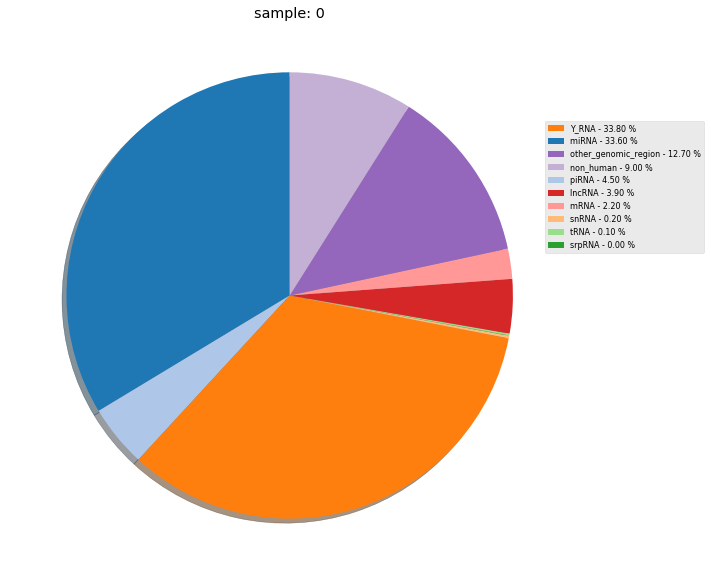

In [25]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

colors = tableau20[:10]
explode = (0,0,0,0,0,0,0.0, 0.0, 0.0, 0.0)
#rnanames = ['miRNA', 'piRNA', 'Y_RNA', 'other_genome','NonHuman','snRNA','srpRNA','tRNA','lncRNA','mRNA']


fig, ax = plt.subplots(figsize=(10,10))

def update(num):
    ax.clear()
    ax.axis('equal')
    x = rnanames
    y = ratiodata[num]
    z = np.array([float('{:.3f}'.format(y[i])) for i in range(y.shape[0])])*100
    patches, texts = ax.pie(y,  colors=colours, 
                        shadow=True, startangle=90)
    ax.set_title('sample: '+str(num))
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
    plt.legend(patches, labels, loc='center', bbox_to_anchor=(1.1, .7),
           fontsize=8)

ani = FuncAnimation(fig, update, frames=range(count), interval=500,repeat=True)
ani

In [26]:
percentagedf = pd.DataFrame([[ratiodata[i][j] for i in range(count)] for j in range(10)]).T
percentagedf.columns = rnanames

In [27]:
percentagedf.head()

,miRNA,piRNA,Y_RNA,snRNA,srpRNA,tRNA,lncRNA,mRNA,other_genomic_region,non_human
0,0.336476,0.045010,0.337721,0.001959,0.000213,0.001323,0.039223,0.021805,0.126771,0.089502
1,0.516025,0.012363,0.244420,0.003220,0.000182,0.000896,0.011015,0.006789,0.132092,0.072999
2,0.281854,0.043006,0.401660,0.001541,0.000181,0.001584,0.031029,0.012033,0.116245,0.110865
3,0.507577,0.026524,0.188306,0.001231,0.000146,0.001251,0.028299,0.010192,0.099119,0.137355
4,0.425969,0.007758,0.202227,0.003823,0.000297,0.001293,0.009777,0.006793,0.096533,0.245531


In [28]:
my_pal = {}
for i in range(10):
    my_pal[rnanames[i]] = tableau20[i]

[Text(0,0,'0.0%'),
 Text(0,0,'10.0%'),
 Text(0,0,'20.0%'),
 Text(0,0,'30.0%'),
 Text(0,0,'40.0%'),
 Text(0,0,'50.0%'),
 Text(0,0,'60.0%'),
 Text(0,0,'70.0%'),
 Text(0,0,'80.0%'),
 Text(0,0,'90.0%')]

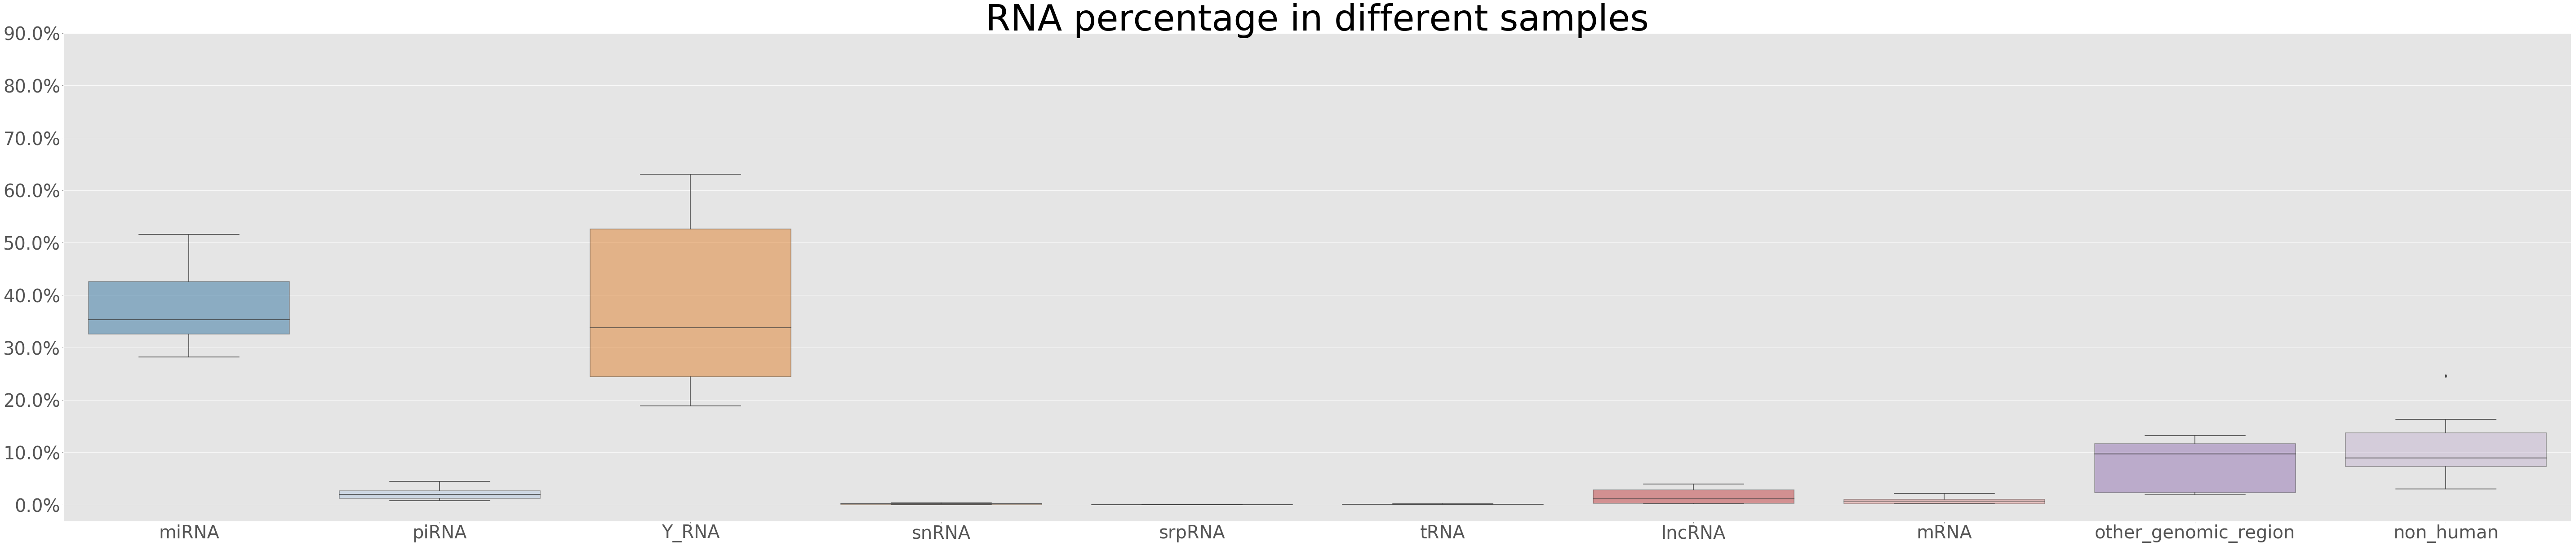

In [29]:
fig, ax = plt.subplots(figsize=(100,20))
sns.boxplot(data =percentagedf,ax=ax,boxprops=dict(alpha=.5),palette=my_pal)
ax.set_title(u'RNA percentage in different samples',fontsize=80)
ax.set_xticks(range(10))
ax.set_xticklabels(rnanames,fontsize=40)
ax.set_yticks(np.arange(0,1,0.1))
ax.set_yticklabels(['{:.1f}%'.format(i*10) for i in range(10)],fontsize=40)

# 2. read length distribution

In [30]:
lengthname = np.loadtxt(path_length,dtype='str')[0]
# ['hg38', 'miRNA', 'piRNA', 'Y_RNA', 'snRNA', 'srpRNA', 'lncRNA','tRNA', 'mRNA']
lengthdat = np.loadtxt(path_length,dtype='str')[1:].astype('float')

In [35]:
lengthdat

array([[2.44412345e-01, 1.30395682e-01, 4.59730234e-01, 4.66010475e-02,
        9.93589437e-01, 3.49216046e+00, 7.06176046e-01, 3.33923304e+00,
        2.77434458e+00],
       [2.99055732e-01, 2.08137382e-01, 4.96805253e-01, 8.18411976e-02,
        1.48178579e+00, 2.76929342e+00, 6.46398864e-01, 2.25893150e+00,
        1.77670775e+00],
       [1.17950762e+00, 1.43205531e+00, 3.82852034e-01, 3.06747789e-01,
        2.83172990e+00, 2.88128691e+00, 9.26804440e-01, 3.01540479e+00,
        3.87982204e+00],
       [8.55195412e-01, 1.17890583e+00, 5.65009297e-01, 9.91710178e-02,
        3.98295612e+00, 2.62675626e+00, 9.37851346e-01, 3.67879384e+00,
        3.31310397e+00],
       [2.83528913e+00, 5.40601031e+00, 3.62495750e-01, 3.83065240e-02,
        1.01307908e+01, 2.98309917e+00, 1.06845262e+00, 5.87217306e+00,
        2.95119435e+00],
       [1.81088321e+01, 4.09251127e+01, 6.53499672e-01, 8.82054369e-02,
        1.45159595e+01, 5.08043168e+00, 1.30425760e+00, 5.81186496e+00,
        2.7

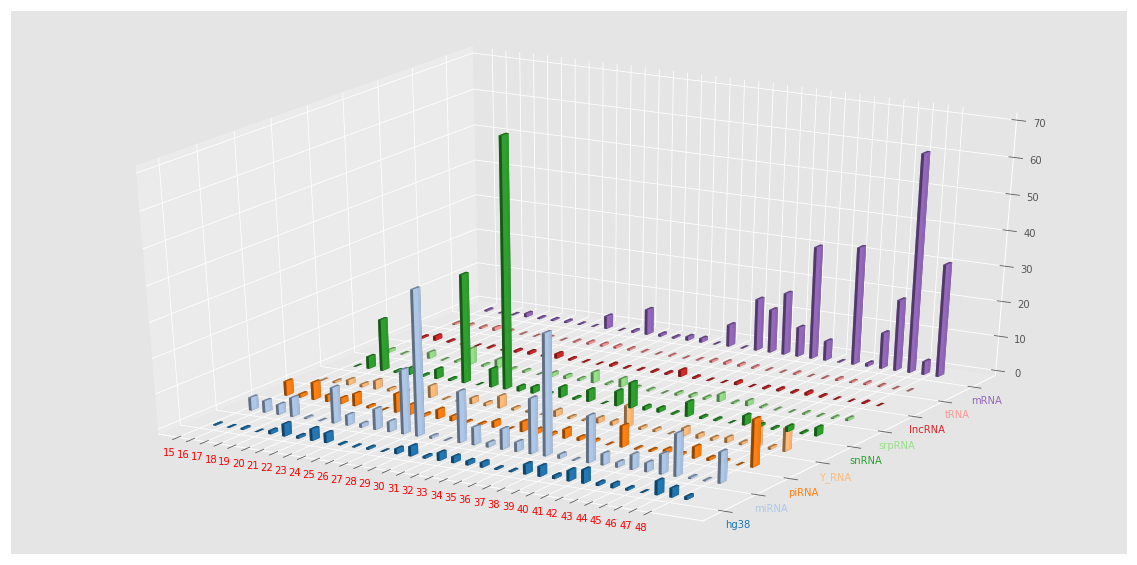

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

#count_ = 34
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, projection='3d')

xpos = np.repeat(np.arange(1,count_+1),9).reshape(count_,-1).T.ravel()
ypos = np.repeat(range(9),count_).ravel()
num_elements = len(xpos)
zpos = np.zeros(count_*9)
dx = np.ones(count_*9)/5
dy = np.ones(count_*9)/5
dz = lengthdat.ravel()

for i in range(9):
    ax1.bar3d(xpos[count_*i:count_*(i+1)], ypos[count_*i:count_*(i+1)], zpos[count_*i:count_*(i+1)],
              dx[count_*i:count_*(i+1)], dy[count_*i:count_*(i+1)],dz[count_*i:count_*(i+1)], color=tableau20[i],alpha=0.9)
plt.xticks(range(count_), [str(i+15) for i in range(count_)], color='red')
#for i in range(9):
ax1.set_yticks(range(9))
ax1.set_yticklabels(lengthname, color='blue')
for color,tick in zip(tableau20[:9],ax1.yaxis.get_major_ticks()):
    tick.label1.set_color(color)

#ax1.bar3d(xpos[3:], ypos[3:], zpos[3:], dx[3:], dy[3:], dz[3:], color='b')
plt.show()

In [32]:
dfnew = pd.DataFrame(np.concatenate((xpos.reshape(-1,1),ypos.reshape(-1,1),dz.reshape(-1,1),dz.reshape(-1,1)*100),axis=1))
dfnew.columns = ['x','y','percentage','size']
#lengthname = ['hg38', 'miRNA', 'piRNA', 'Y_RNA', 'snRNA', 'snpRNA', 'lncRNA','tRNA', 'mRNA']
dfnew['rnaname'] = np.repeat(np.array(lengthname),34)
hover_text = []
for index, row in dfnew.iterrows():
    hover_text.append(('RNA: {country}<br>'+
                      'Reads Length: {lifeExp}<br>'+
                      'Reads percentage: {gdp}<br>'
                      ).format(country=row['rnaname'],
                                            lifeExp=row['x'],
                                            gdp=row['percentage']
                                           ))
sizeref = 2.*max(dfnew['size'])/(100**2)
dfnew['text'] = hover_text

In [33]:
data = [go.Scatter(
    y=dfnew['y'][dfnew['rnaname'] ==lengthname[i]],
    x=dfnew['x'][dfnew['rnaname'] == lengthname[i]]+15,
    mode='markers',
    name=lengthname[i],
    text=dfnew['text'][dfnew['rnaname'] == lengthname[i]],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=dfnew['size'][dfnew['rnaname'] == lengthname[i]],
        line=dict(
            width=2
        ),
    )
) for i in range(8)]


layout = go.Layout(
    title='Reads Length Distribution',
    xaxis=dict(
        title='Length',
        gridcolor='rgb(255, 255, 255)',
        range=[10,60],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='RNA',
        gridcolor='rgb(255, 255, 255)',
        range=[-1,8],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='life-expectancy-per-GDP-2007')

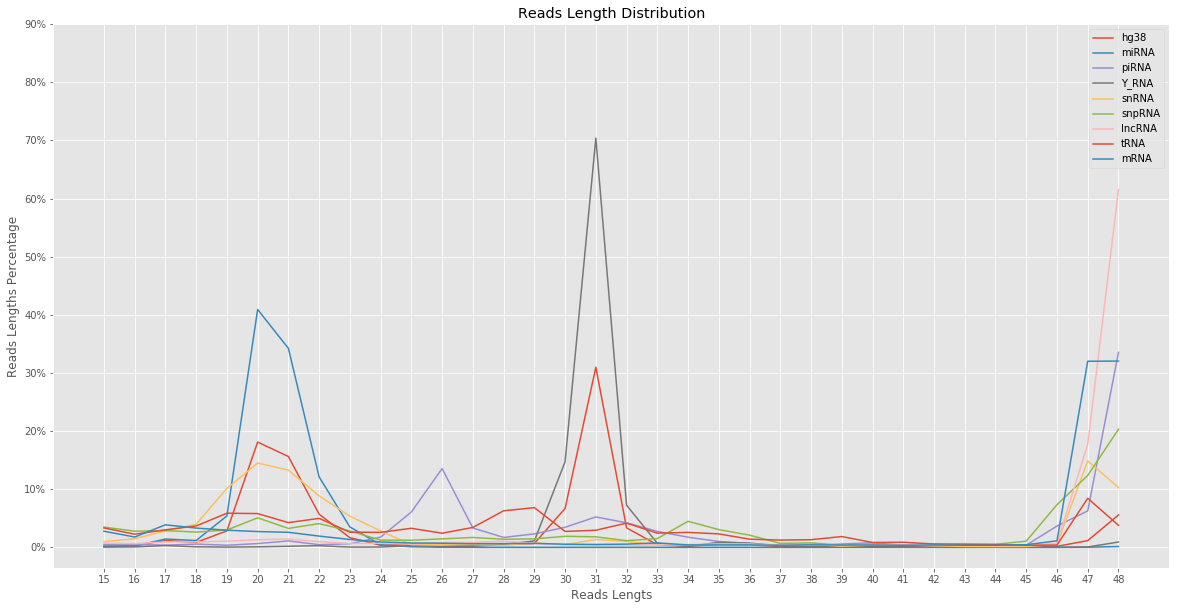

In [34]:
fig, ax = plt.subplots(1,figsize=(20,10))
labels = lengthname
for y_arr, label in zip(lengthdat.T, labels):
    plt.plot(y_arr, label=label)
ax.set_title('Reads Length Distribution')
ax.set_xlabel('Reads Lengts')
ax.set_ylabel('Reads Lengths Percentage')
ax.set_xticks(range(count_))
ax.set_yticks(np.arange(0,100,10))
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(count_):
    labels[i] = str(i+15)
labels_y = [item.get_text() for item in ax.get_yticklabels()]
for i in range(10):
    labels_y[i] = str(i*10)+'%'
ax.set_xticklabels(labels)
ax.set_yticklabels(labels_y)
plt.legend()
plt.show()